# 선형회귀
* 1) 최적해 공식을 이용한 방법
* 2) 경사 하강을 이용한 방법

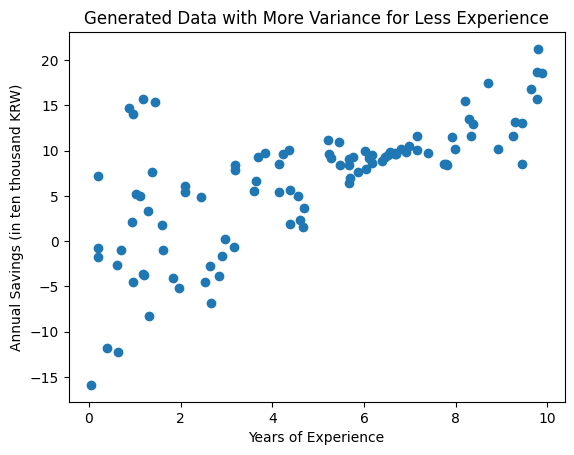

In [79]:
## 1-1) 최적해 공식을 이용한 방법

%reset -f

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 2차원 데이터 생성 (경력 대비 연 저축액)
np.random.seed(0)
experience = 10 * np.random.rand(100, 1)  # 경력 (년)

# 정규 분포에서 샘플링한 상수항과 기울기
intercept = np.random.normal(loc=0.0, scale=2.0)
slope = np.random.normal(loc=0.0, scale=2.0)

# 경력이 작을수록 더 큰 노이즈 추가
noise = np.random.randn(100, 1) * (10 - experience * 1.5)  # 경력이 작을수록 노이즈가 큼
savings = intercept + slope * experience + noise

# 데이터 시각화
plt.scatter(experience, savings)
plt.xlabel('Years of Experience')
plt.ylabel('Annual Savings (in ten thousand KRW)')
plt.title('Generated Data with More Variance for Less Experience')
plt.show()


In [80]:
# 데이터 분할 (훈련, 테스트)
X_train, X_test, y_train, y_test = train_test_split(experience, savings, test_size=0.2, random_state=42)

# 데이터 전처리 (표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 행렬 형태로 변환 (절편 항 추가)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # 절편 추가
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # 절편 추가


In [81]:
## 1-1) 산술적 최적해

import numpy as np
import matplotlib.pyplot as plt

# 행렬 형태로 변환
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # 절편 추가
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # 절편 추가

# 유사역행렬을 이용한 회귀 계수 계산
theta_opt = np.linalg.pinv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
print(f"Calculated coefficients (θ): {theta_opt}")

# 절편과 기울기
intercept, slope = theta_opt[0], theta_opt[1]
print(f"Intercept: {intercept}, Slope: {slope}")


Calculated coefficients (θ): [[6.33231858]
 [5.09957583]]
Intercept: [6.33231858], Slope: [5.09957583]


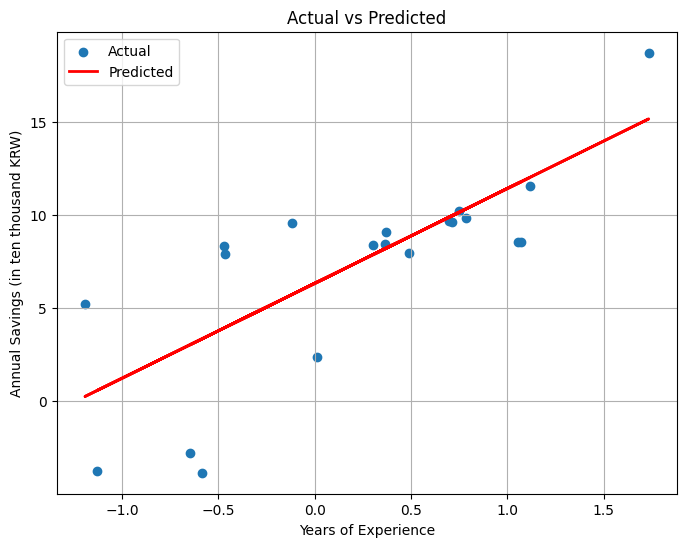

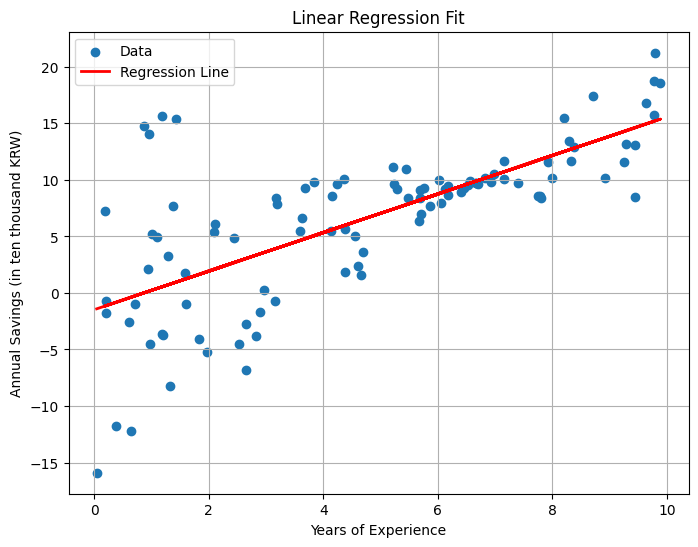

In [83]:
# 예측
y_pred = X_test_b.dot(theta_opt)

# 실제 값과 예측 값 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted', linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Annual Savings (in ten thousand KRW)')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

# 전체 데이터에 대한 회귀선 시각화
plt.figure(figsize=(8, 6))
plt.scatter(experience, savings, label='Data')
plt.plot(experience, np.c_[np.ones((experience.shape[0], 1)), scaler.transform(experience)].dot(theta_opt), color='red', label='Regression Line', linewidth=2)
plt.xlabel('Years of Experience')
plt.ylabel('Annual Savings (in ten thousand KRW)')
plt.title('Linear Regression Fit')
plt.legend()
plt.grid(True)
plt.show()


In [84]:
## 1-2) 경사하강을 이용한 방법

# 학습률과 반복 횟수 설정
learning_rate = 0.1
n_iterations = 20
m = len(X_train_b)  # 샘플 수

# 초기화
theta = -np.random.randn(2, 1)  # 무작위 초기화
history = [theta.copy()]  # 단계별 회귀 계수 저장

# 경사 하강법
for iteration in range(n_iterations):
    gradients = 2/m * X_train_b.T.dot(X_train_b.dot(theta) - y_train)
    theta -= learning_rate * gradients
    if iteration % 4 == 0:  # 100번마다 기록
        history.append(theta.copy())

# 최종 회귀 계수 출력
print(f"Optimal coefficients (θ*): {theta_opt}")
print(f"Final coefficients (θ): {theta}")


Optimal coefficients (θ*): [[6.33231858]
 [5.09957583]]
Final coefficients (θ): [[6.26673233]
 [5.06641582]]


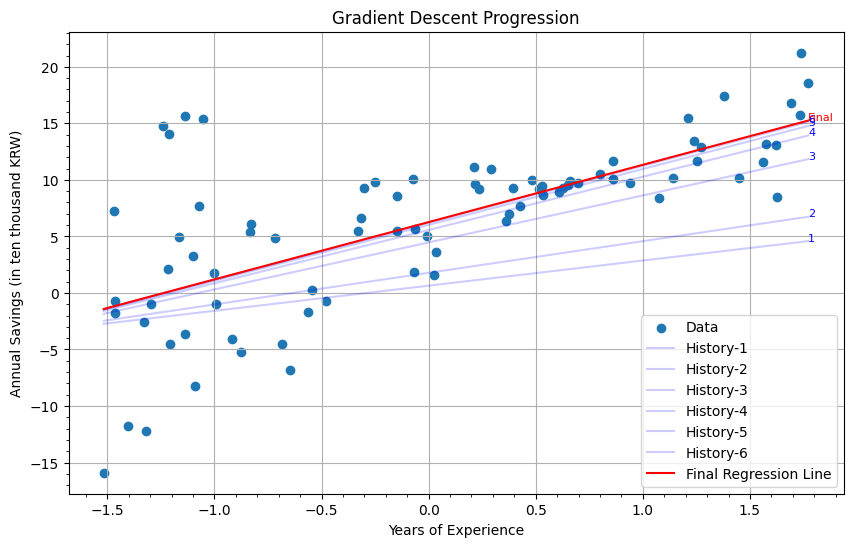

In [85]:
import numpy as np
import matplotlib.pyplot as plt

# 시각화 함수
def plot_gradient_descent(X, y, history, final_theta):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 1], y, label='Data')
    x_vals = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    k = 1
    for theta in history:
        y_vals = theta[0] + theta[1] * x_vals
        plt.plot(x_vals, y_vals, color='blue', alpha=0.2, label=f'History-{k}')
        plt.text(x_vals[-1], y_vals[-1], f'{k}', color='blue', fontsize=8)
        k += 1
    y_vals_final = final_theta[0] + final_theta[1] * x_vals
    plt.plot(x_vals, y_vals_final, color='red', label='Final Regression Line')
    plt.text(x_vals[-1], y_vals_final[-1], 'Final', color='red', fontsize=8)
    plt.xlabel('Years of Experience')
    plt.ylabel('Annual Savings (in ten thousand KRW)')
    plt.title('Gradient Descent Progression')
    plt.legend()
    plt.grid(True)
    plt.minorticks_on()
    plt.show()

# 단계별 회귀 직선 시각화
plot_gradient_descent(X_train_b, y_train, history, theta)


# 로지스틱 회귀

* 1) 최소제곱법을 이용한 경사하강
* 2) 로그 우도 함수를 이용한 경사상승

In [118]:
## 2-1) 최소제곱법을 이용한 경사하강

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target

# 데이터 분할 (훈련, 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 전처리 (표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 행렬 형태로 변환 (절편 항 추가)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # 절편 추가
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # 절편 추가


In [120]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def squared_error_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# 학습률과 반복 횟수 설정
learning_rate = 0.01
n_iterations = 2000
m = len(X_train_b)  # 샘플 수

# 초기화
theta = -np.random.randn(X_train_b.shape[1], 1)  # 무작위 초기화
history = []  # 단계별 회귀 계수 저장
loss_history = [theta.copy()]  # 단계별 손실 값 저장

# 경사 하강법
for iteration in range(n_iterations):
    logits = X_train_b.dot(theta)
    y_proba = sigmoid(logits)
    loss = squared_error_loss(y_train.reshape(-1, 1), y_proba)
    gradients = 1/m * X_train_b.T.dot(y_proba - y_train.reshape(-1, 1))
    theta -= learning_rate * gradients
    if iteration % 100 == 0:
        history.append(theta.copy())
        loss_history.append(loss)

# 최종 회귀 계수 출력
print(f"Final coefficients (θ): {theta}")

# 예측 함수
def predict(X, theta, threshold=0.5):
    return (sigmoid(X.dot(theta)) >= threshold).astype(int)

# 테스트 데이터에 대한 예측
y_pred = predict(X_test_b, theta)

# 정확도 계산
accuracy = np.mean(y_pred == y_test.reshape(-1, 1))
print(f"Accuracy: {accuracy:.2f}")


Final coefficients (θ): [[ 1.54025477]
 [-1.37637793]
 [-1.09903225]
 [-1.02472137]
 [ 0.39564408]
 [ 0.42453708]
 [-0.11287272]
 [-0.61157739]
 [-0.69322721]
 [-0.28882371]
 [ 0.362684  ]
 [ 0.67190616]
 [ 0.61027513]
 [-1.95309265]
 [-0.11154425]
 [ 0.64110112]
 [-1.06183486]
 [ 2.25723514]
 [-1.56447332]
 [ 0.32476163]
 [ 0.29881945]
 [-1.06507376]
 [-1.02113655]
 [-0.66066925]
 [-0.15364777]
 [-1.48194338]
 [ 1.9032056 ]
 [-0.84483897]
 [ 0.41958765]
 [-0.20375628]
 [-1.80085174]]
Accuracy: 0.96


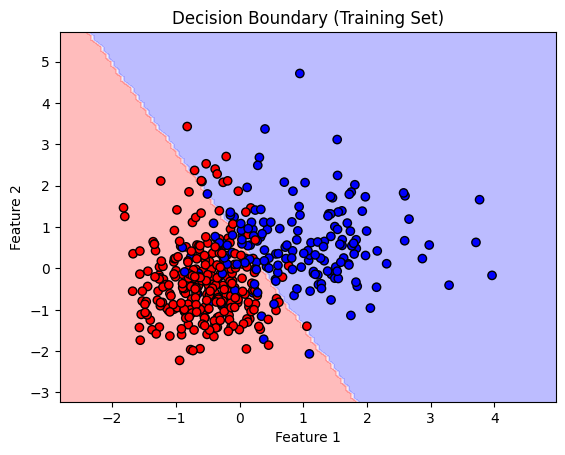

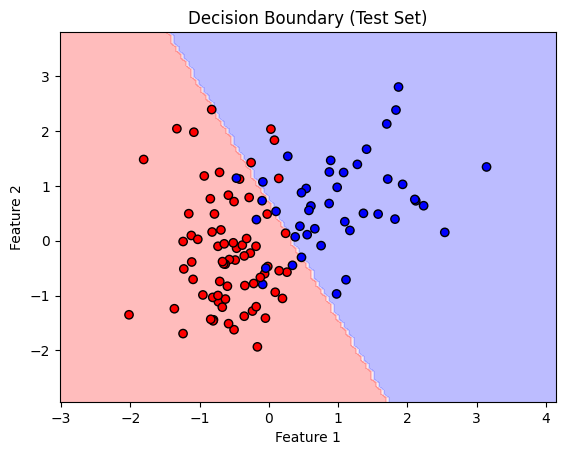

In [121]:
# 두 개의 주요 특징 선택 (첫 번째와 두 번째)
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# 행렬 형태로 변환 (절편 항 추가)
X_train_2d_b = np.c_[np.ones((X_train_2d.shape[0], 1)), X_train_2d]  # 절편 추가
X_test_2d_b = np.c_[np.ones((X_test_2d.shape[0], 1)), X_test_2d]  # 절편 추가

# 2D 데이터로 학습
theta_2d = np.random.randn(X_train_2d_b.shape[1], 1)
for iteration in range(n_iterations):
    logits = X_train_2d_b.dot(theta_2d)
    y_proba = sigmoid(logits)
    gradients = 1/m * X_train_2d_b.T.dot(y_proba - y_train.reshape(-1, 1))
    theta_2d -= learning_rate * gradients

# 결정 경계 시각화 함수
def plot_decision_boundary(X, y, theta, title):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    X_new = np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()]
    Z = predict(X_new, theta)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# 훈련 데이터에 대한 결정 경계 시각화
plot_decision_boundary(X_train_2d_b, y_train, theta_2d, 'Decision Boundary (Training Set)')

# 테스트 데이터에 대한 결정 경계 시각화
plot_decision_boundary(X_test_2d_b, y_test, theta_2d, 'Decision Boundary (Test Set)')


In [123]:
## 2-2) 우도 함수를 이용한 경사상승

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_likelihood_loss(y_true, y_pred):
    epsilon = 1e-15  # 작은 값 추가하여 로그 함수에서 0을 피함
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# 학습률과 반복 횟수 설정
learning_rate = 0.01
n_iterations = 2000
m = len(X_train_b)  # 샘플 수

# 초기화
theta = np.random.randn(X_train_b.shape[1], 1)  # 무작위 초기화
history = []  # 단계별 회귀 계수 저장
loss_history = []  # 단계별 손실 값 저장

# 경사 하강법
for iteration in range(n_iterations):
    logits = X_train_b.dot(theta)
    y_proba = sigmoid(logits)
    loss = log_likelihood_loss(y_train.reshape(-1, 1), y_proba)
    gradients = 1/m * X_train_b.T.dot(y_proba - y_train.reshape(-1, 1))
    theta -= learning_rate * gradients
    if iteration % 100 == 0:
        history.append(theta.copy())
        loss_history.append(loss)

# 최종 회귀 계수 출력
print(f"Final coefficients (θ): {theta}")

# 예측 함수
def predict(X, theta, threshold=0.5):
    return (sigmoid(X.dot(theta)) >= threshold).astype(int)

# 테스트 데이터에 대한 예측
y_pred = predict(X_test_b, theta)

# 정확도 계산
accuracy = np.mean(y_pred == y_test.reshape(-1, 1))
print(f"Accuracy: {accuracy:.2f}")


Final coefficients (θ): [[ 0.4302814 ]
 [-1.01567262]
 [-0.62435438]
 [-1.44148018]
 [-0.65366747]
 [-1.14381505]
 [ 0.7007663 ]
 [-1.05953361]
 [-0.05841138]
 [-0.7273141 ]
 [ 0.27947653]
 [-0.28309173]
 [-0.8439069 ]
 [ 0.007751  ]
 [-0.5894104 ]
 [-0.92439407]
 [-0.72294841]
 [ 0.83904493]
 [ 0.99702211]
 [ 0.5427547 ]
 [ 1.14691526]
 [-0.39038035]
 [-0.17081867]
 [ 0.72003234]
 [-2.01558795]
 [ 0.68933648]
 [-0.39086655]
 [-0.51568796]
 [-0.80740177]
 [-0.52283086]
 [-0.87411756]]
Accuracy: 0.97


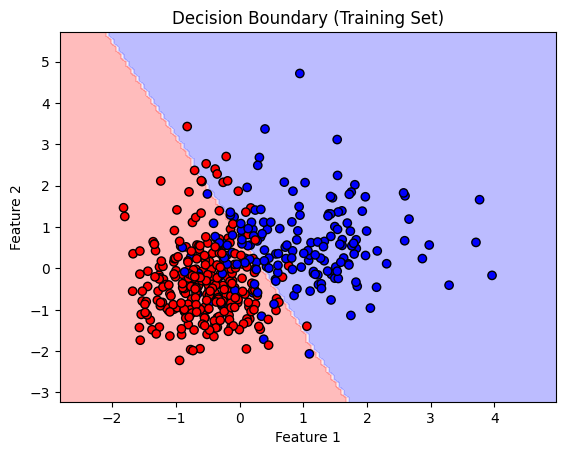

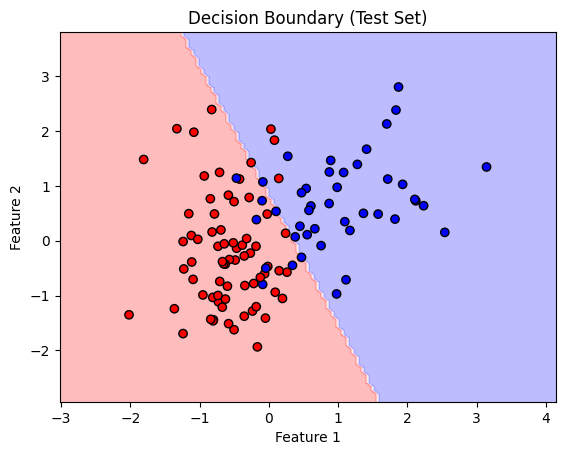

In [124]:
# 두 개의 주요 특징 선택 (첫 번째와 두 번째)
X_train_2d = X_train[:, :2]
X_test_2d = X_test[:, :2]

# 행렬 형태로 변환 (절편 항 추가)
X_train_2d_b = np.c_[np.ones((X_train_2d.shape[0], 1)), X_train_2d]  # 절편 추가
X_test_2d_b = np.c_[np.ones((X_test_2d.shape[0], 1)), X_test_2d]  # 절편 추가

# 2D 데이터로 학습
theta_2d = np.random.randn(X_train_2d_b.shape[1], 1)
for iteration in range(n_iterations):
    logits = X_train_2d_b.dot(theta_2d)
    y_proba = sigmoid(logits)
    gradients = 1/m * X_train_2d_b.T.dot(y_proba - y_train.reshape(-1, 1))
    theta_2d -= learning_rate * gradients

# 결정 경계 시각화 함수
def plot_decision_boundary(X, y, theta, title):
    x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    X_new = np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()]
    Z = predict(X_new, theta)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='bwr')
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# 훈련 데이터에 대한 결정 경계 시각화
plot_decision_boundary(X_train_2d_b, y_train, theta_2d, 'Decision Boundary (Training Set)')

# 테스트 데이터에 대한 결정 경계 시각화
plot_decision_boundary(X_test_2d_b, y_test, theta_2d, 'Decision Boundary (Test Set)')


# Softmax Regression

* 1) Pure Loss Function
* 2) with L2 Regularization

In [125]:
## 3-1) Pure Loss Function

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# 데이터 로드
digits = load_digits()
X = digits.data
y = digits.target

# One-hot encoding for target
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# 데이터 분할 (훈련, 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# 데이터 전처리 (표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 행렬 형태로 변환 (절편 항 추가)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # 절편 추가
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # 절편 추가


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [127]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # 작은 값 추가하여 로그 함수에서 0을 피함
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

# 학습률과 반복 횟수 설정
learning_rate = 0.01
n_iterations = 5000
m = len(X_train_b)  # 샘플 수
n_classes = y_train.shape[1]  # 클래스 수

# 초기화
theta = np.random.randn(X_train_b.shape[1], n_classes)  # 무작위 초기화
loss_history = []  # 단계별 손실 값 저장

# 경사 하강법
for iteration in range(n_iterations):
    logits = X_train_b.dot(theta)
    y_proba = softmax(logits)
    loss = cross_entropy_loss(y_train, y_proba)
    gradients = 1/m * X_train_b.T.dot(y_proba - y_train)
    theta -= learning_rate * gradients
    if iteration % 100 == 0:
        loss_history.append(loss)

# 최종 회귀 계수 출력
print(f"Final coefficients (θ): {theta}")

# 예측 함수
def predict(X, theta):
    logits = X.dot(theta)
    y_proba = softmax(logits)
    return np.argmax(y_proba, axis=1)

# 테스트 데이터에 대한 예측
y_pred = predict(X_test_b, theta)

# 정확도 계산
accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy:.2f}")


Final coefficients (θ): [[ 3.76928465e-01 -2.33980444e-01 -2.13162344e-01  5.18594882e-01
   5.32848211e-02 -3.36638818e-01 -8.79287111e-01  1.66410599e-01
   4.47769798e-01 -4.05273357e-01]
 [ 1.57629897e+00  5.02328240e-01 -8.62267000e-01  1.60661190e-01
  -9.52644953e-01  1.60852216e+00 -5.61578750e-01  2.07270747e-01
   3.07732575e-01  1.59250468e-01]
 [-1.88593905e+00 -1.56998874e+00 -2.10874210e-01  2.93664642e-01
  -1.62574020e-01 -6.63925052e-01 -1.47187222e+00 -5.08654142e-01
  -4.81894378e-01  3.23620563e-01]
 [-1.12121126e-01 -9.97428739e-02 -1.65454172e-01 -2.51465578e-02
  -6.10003276e-01  7.52119126e-02 -1.09137208e-01 -7.07266490e-01
  -4.35949498e-01 -2.98260798e-01]
 [-6.52364314e-01 -6.22221440e-01 -3.16726831e-01 -1.34547555e-01
  -1.33921587e+00 -2.09730796e-01 -1.79042325e-01  2.11746302e+00
  -7.83352685e-01  7.46178591e-01]
 [-5.22431286e-02 -1.31934284e-02 -2.33374805e-01  1.61419046e-01
  -4.93092713e-01 -1.15430125e-01 -3.61957817e-01 -8.43685613e-01
   9.0777

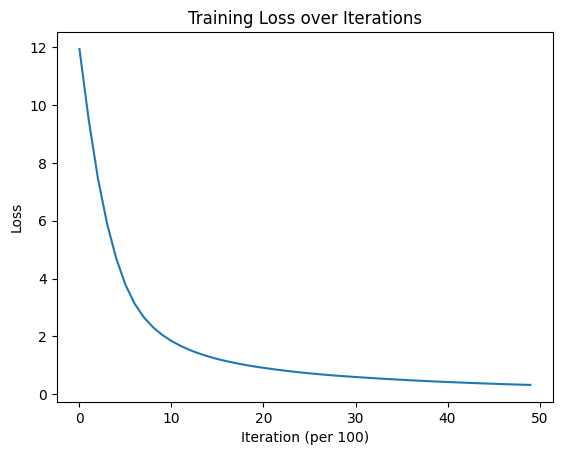

In [128]:
# 손실 변화 시각화
plt.plot(loss_history)
plt.xlabel('Iteration (per 100)')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()


In [ ]:
## 3-2) L2 Regularization

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# 데이터 로드
digits = load_digits()
X = digits.data
y = digits.target

# One-hot encoding for target
encoder = OneHotEncoder(sparse=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))

# 데이터 분할 (훈련, 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# 데이터 전처리 (표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 행렬 형태로 변환 (절편 항 추가)
X_train_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # 절편 추가
X_test_b = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # 절편 추가


In [ ]:
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def cross_entropy_loss(y_true, y_pred):
    epsilon = 1e-15  # 작은 값 추가하여 로그 함수에서 0을 피함
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(np.sum(y_true * np.log(y_pred), axis=1))

def l2_regularization_cost(w, l2_lambda):
    return 0.5 * l2_lambda * np.sum(w[1:] ** 2)  # 절편 항 제외

# 학습률과 반복 횟수 설정
learning_rate = 0.01
n_iterations = 5000
m = len(X_train_b)  # 샘플 수
n_classes = y_train.shape[1]  # 클래스 수
l2_lambda = 0.1  # L2 규제 강도

# 초기화
theta = np.random.randn(X_train_b.shape[1], n_classes)  # 무작위 초기화
loss_history = []  # 단계별 손실 값 저장

# 경사 하강법
for iteration in range(n_iterations):
    logits = X_train_b.dot(theta)
    y_proba = softmax(logits)
    loss = cross_entropy_loss(y_train, y_proba) + l2_regularization_cost(theta, l2_lambda)
    gradients = 1/m * X_train_b.T.dot(y_proba - y_train) + l2_lambda * np.r_[np.zeros((1, n_classes)), theta[1:]]
    theta -= learning_rate * gradients
    if iteration % 100 == 0:
        loss_history.append(loss)

# 최종 회귀 계수 출력
print(f"Final coefficients (θ): {theta}")

# 예측 함수
def predict(X, theta):
    logits = X.dot(theta)
    y_proba = softmax(logits)
    return np.argmax(y_proba, axis=1)

# 테스트 데이터에 대한 예측
y_pred = predict(X_test_b, theta)

# 정확도 계산
accuracy = np.mean(y_pred == np.argmax(y_test, axis=1))
print(f"Accuracy: {accuracy:.2f}")

# 손실 변화 시각화
plt.plot(loss_history)
plt.xlabel('Iteration (per 100)')
plt.ylabel('Loss')
plt.title('Training Loss over Iterations')
plt.show()


# SVM: Support Vector Machine

* 1) Hard-Threshold
* 2) Soft-Magin

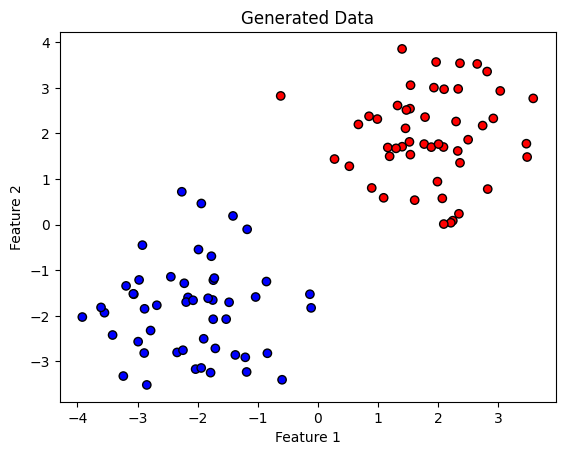

In [135]:
## 4-1) Hard-Threshold

import numpy as np
import matplotlib.pyplot as plt

# 이진 분류를 위한 간단한 2D 데이터 생성
np.random.seed(42)
X1 = np.random.randn(50, 2) + np.array([2, 2])
X2 = np.random.randn(50, 2) + np.array([-2, -2])
X = np.vstack((X1, X2))
y = np.hstack((np.ones(50), -np.ones(50)))

# 데이터 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Data')
plt.show()


In [136]:
def hinge_loss(margins):
    return np.maximum(0, 1 - margins)

def loss_function(X, y, w, b):
    margins = y * (np.dot(X, w) + b)
    loss = np.sum(hinge_loss(margins))
    return loss

def gradient_descent(X, y, learning_rate=0.01, n_iterations=10000):
    w = np.random.randn(X.shape[1])
    b = 0
    for iteration in range(n_iterations):
        margins = y * (np.dot(X, w) + b)
        loss = hinge_loss(margins)
        indicator = margins < 1
        dw = -np.sum((X.T * y * indicator), axis=1)
        db = -np.sum(y * indicator)
        w -= learning_rate * dw
        b -= learning_rate * db
    return w, b

# 경계면 찾기
w, b = gradient_descent(X, y)

print(f"Weights: {w}")
print(f"Bias: {b}")

def find_support_vectors(X, y, w, b, num_support_vectors=3):
    distances = np.abs(y * (np.dot(X, w) + b)) / np.linalg.norm(w)
    support_vector_indices = np.argsort(distances)[:num_support_vectors]
    return support_vector_indices

# 서포트 벡터 찾기
support_vector_indices = find_support_vectors(X, y, w, b)
support_vectors = X[support_vector_indices]

print(f"Support Vector Indices: {support_vector_indices}")
print(f"Support Vectors: {support_vectors}")


Weights: [0.75167261 0.61604306]
Bias: -0.08
Support Vector Indices: [ 7 62 83]
Support Vectors: [[ 0.27508217  1.43771247]
 [-1.41314291  0.19045563]
 [-1.17793984 -0.10320702]]


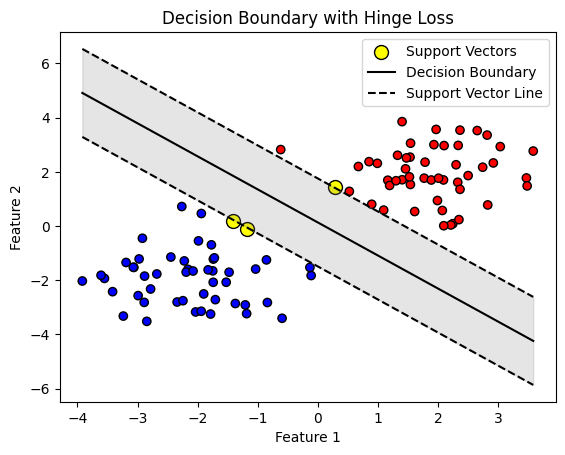

In [138]:
# 경계면 시각화
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], color='yellow', edgecolors='k', s=100, label='Support Vectors')

# 경계면
x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(w[0] * x_vals + b) / w[1]
margin = 1 / np.linalg.norm(w)

# 서포트 벡터를 통과하는 평행한 직선
y_vals_pos = -(w[0] * x_vals + b - 1) / w[1]
y_vals_neg = -(w[0] * x_vals + b + 1) / w[1]

plt.plot(x_vals, y_vals, 'k-', label='Decision Boundary')
plt.plot(x_vals, y_vals_pos, 'k--', label='Support Vector Line')
plt.plot(x_vals, y_vals_neg, 'k--')
plt.fill_between(x_vals, y_vals_neg, y_vals_pos, color='gray', alpha=0.2)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Decision Boundary with Hinge Loss')
plt.legend()
plt.show()


In [147]:
## 4-2) Soft Margin SVM

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 로드
data = load_breast_cancer()
X = data.data
y = data.target

# 데이터 분할 (훈련, 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 전처리 (표준화)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [152]:
def hinge_loss(margins):
    return np.maximum(0, 1 - margins)

def loss_function(X, y, w, b, C):
    margins = y * (np.dot(X, w) + b)
    loss = np.sum(hinge_loss(margins)) + 0.5 * C * np.sum(w**2)
    return loss


def gradient_descent(X, y, C=1.0, learning_rate=0.01, n_iterations=1000000):
    w = np.random.randn(X.shape[1])
    b = 0
    epsilon = 1e-10
    for iteration in range(n_iterations):
        margins = y * (np.dot(X, w) + b)
        loss = hinge_loss(margins)
        indicator = margins < 1
        dw = -np.sum((X.T * y * indicator), axis=1) + C * w
        db = -np.sum(y * indicator)
        w -= learning_rate * dw
        b -= learning_rate * db
    return w, b

# 경계면 찾기
C = 1.0
w, b = gradient_descent(X_train, y_train, C)

print(f"Weights: {w}")
print(f"Bias: {b}")

def find_support_vectors(X, y, w, b):
    epsilon = 1e-10
    distances = np.abs(y * (np.dot(X, w) + b)) / (np.linalg.norm(w) + epsilon)
    support_vector_indices = np.where(distances <= 1 + epsilon)[0]
    return support_vector_indices

# 서포트 벡터 찾기
support_vector_indices = find_support_vectors(X_train, y_train, w, b)
support_vectors = X_train[support_vector_indices]

print(f"Support Vector Indices: {support_vector_indices}")
print(f"Support Vectors: {support_vectors}")


Weights: [-2.4e-322 -2.4e-322  2.4e-322 -2.4e-322 -2.4e-322 -2.4e-322 -2.4e-322
 -2.4e-322 -2.4e-322  2.4e-322 -2.4e-322  2.4e-322 -2.4e-322 -2.4e-322
 -2.4e-322 -2.4e-322 -2.4e-322  2.4e-322  2.4e-322  2.4e-322  2.4e-322
 -2.4e-322 -2.4e-322 -2.4e-322 -2.4e-322 -2.4e-322 -2.4e-322 -2.4e-322
 -2.4e-322  2.4e-322]
Bias: 2.2299999999999995
Support Vector Indices: [  1   5   9  11  12  15  16  17  21  25  27  30  32  33  34  36  41  42
  50  55  62  69  70  71  74  76  81  84  88  90  91  95 100 106 108 109
 112 120 121 122 125 128 130 132 134 137 141 143 145 147 150 155 159 162
 165 173 177 179 183 185 186 189 191 192 193 197 200 202 206 208 211 212
 215 217 218 220 221 224 225 226 231 233 234 235 236 245 246 249 255 258
 259 261 263 270 273 280 283 285 286 287 289 292 293 294 302 306 309 310
 312 314 315 318 320 321 323 324 327 329 332 335 336 337 341 342 344 345
 349 351 352 353 354 357 360 361 362 363 364 365 373 374 375 376 381 383
 389 390 391 394 397 398 399 400 403 404 408 409 410

In [153]:
def predict(X, w, b):
    return np.sign(np.dot(X, w) + b)

# 테스트 데이터에 대한 예측
y_pred = predict(X_test, w, b)

# 정확도 계산
accuracy = np.mean(y_pred == y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.62
